# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

## Load Data

Here, we are importing the previous prepared data.

In [3]:
import pandas as pd

In [66]:
df=pd.read_csv('prepared_churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455


In [67]:
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000


In [68]:
df.tail()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455
8361-LTMKD,4.0,1,0,2,74.40,306.60,1,76.650000
3186-AJIEK,66.0,1,2,1,105.65,6844.50,0,103.704545


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   float64
 1   PhoneService       7043 non-null   int64  
 2   Contract           7043 non-null   int64  
 3   PaymentMethod      7043 non-null   int64  
 4   MonthlyCharges     7043 non-null   float64
 5   TotalCharges       7043 non-null   float64
 6   Churn              7043 non-null   int64  
 7   charge_per_tenure  7043 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 495.2+ KB


## AutoML with Pycaret

Here, we use pycaret for AutoML

In [70]:
from pycaret.classification import *

In [71]:
automl = setup(df, target='Churn')

,Description,Value
0,Session id,719
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Here, we will compare and select the best model

In [72]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7959,0.8377,0.5298,0.6402,0.5789,0.4460,0.4500,0.5210
gbc,Gradient Boosting Classifier,0.7903,0.8379,0.4954,0.6342,0.5547,0.4207,0.4270,0.1750
ada,Ada Boost Classifier,0.7901,0.8354,0.5107,0.6284,0.5617,0.4261,0.4311,0.0700
ridge,Ridge Classifier,0.7890,0.8229,0.4388,0.6526,0.5239,0.3953,0.4085,0.0140
lda,Linear Discriminant Analysis,0.7884,0.8229,0.4977,0.6278,0.5544,0.4184,0.4237,0.0110
lightgbm,Light Gradient Boosting Machine,0.7836,0.8293,0.5069,0.6109,0.5526,0.4120,0.4158,0.1160
rf,Random Forest Classifier,0.7759,0.8082,0.4832,0.5970,0.5328,0.3879,0.3923,0.1520
knn,K Neighbors Classifier,0.7734,0.7534,0.4519,0.5974,0.5137,0.3699,0.3765,0.0270
et,Extra Trees Classifier,0.7647,0.7870,0.4916,0.5647,0.5248,0.3697,0.3717,0.1170
qda,Quadratic Discriminant Analysis,0.7507,0.8209,0.7393,0.5216,0.6115,0.4360,0.4506,0.0110


In [73]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=719, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
df.iloc[-2:-1]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.4,306.6,1,76.65


In [75]:
predict_model(best_model, df.iloc[-2:-1])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.5653


Here we will save our best model.

In [76]:
save_model(best_model, 'knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'charge_per_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('c...
                                                         

In [77]:
import pickle
with open('knn.pk', 'wb') as f:
    pickle.dump(best_model, f)

Here we will use the built-in open function to open the file.

In [89]:
with open('knn.pk', 'rb') as f:
    loaded_model = pickle.load(f)

Here, we are loading the new data.

In [79]:
loaded_lda = load_model('knn')

Transformation Pipeline and Model Successfully Loaded


In [80]:
new_data=df.iloc[-2:-1]

Here, will make predictions by using python functions

In [81]:
predict_model(best_model, new_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.5653


Here, we are plotting our best model

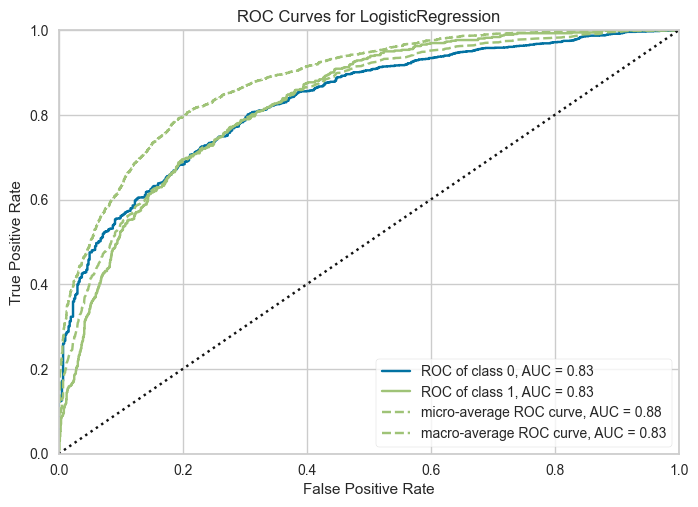

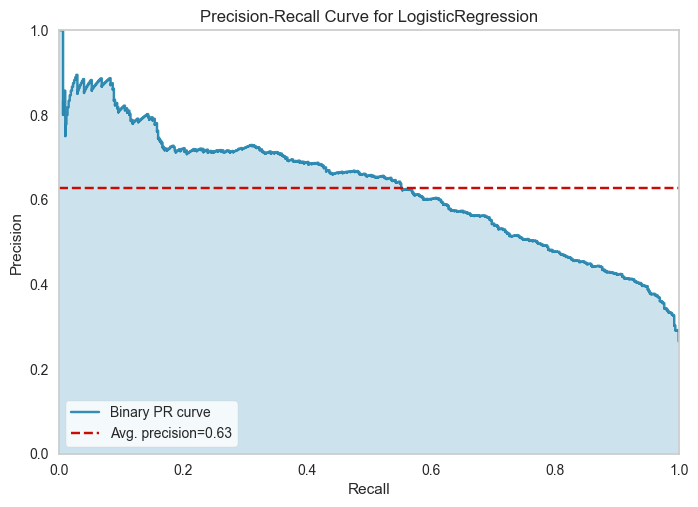

In [91]:
plot_model(best_model, plot='auc')

plot_model(best_model, plot='pr')

## Making a Python module to make predictions

Here, we will use our model in a python file and we will make some predictions.

In [85]:
from IPython.display import Code

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

model = load_model('knn')

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df, threshold=0.5):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    Rounds up to 1 if greater than or equal to the threshold.
    """
    predictions = predict_model(model, data=df)
    predictions['Churn_prediction'] = (predictions['prediction_score'] >= threshold)
    predictions['Churn_prediction'].replace({True: '1', False: '0'}, inplace=True)
    drop_cols = predictions.columns.tolist()
    drop_cols.remove('Churn_prediction')
    return predictions.drop(drop_cols, axis=1)


if __name__ == "__main__":
    df = load_data('new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

Now we will fun our new python file where our we can see the new predictions

In [87]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded


predictions:
           Churn_prediction
customerID                 
9305-CKSKC                0
1452-KNGVK                0
6723-OKKJM                1
7832-POPKP                1
6348-TACGU                1


# Summary

Here, We'll use Pycaret's automated machine learning capabilities to find the best-performing model for our dataset.

We'll choose a metric that makes sense for our problem, like accuracy or AUC. We'll save the best-performing model to disk, so we can use it again later.

In the next step, We'll create a Python script that can take in new data and spit out predictions. This script will be a reusable tool that we can use to make predictions on new data.

Then, We'll test our script with some new data (new_churn_data.csv) and see what predictions it makes.

Later, We'll summarize what we did and what we found out at the end of the notebook. Finally, We'll upload our notebook and script to a Github repository..